In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # pip install scipy
from scipy.stats import skew

plt.rcParams["figure.figsize"] = (10, 6)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("25Wafer_10LayerVariation_SNR30db_train.csv", header=None, skiprows=4); df.head()

,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,600,601
0,1.04360,0.77653,0.84672,0.83199,1.52820,1.28200,1.03750,1.28180,0.98114,0.92108,...,0.55489,0.55656,0.50621,0.40879,0.50317,0.59060,0.41935,0.50326,0.51321,1500
1,1.06020,0.71712,0.90560,1.14410,1.07980,0.94290,0.95501,1.06060,1.23440,1.06240,...,0.49716,0.57034,0.55974,0.57759,0.43101,0.46000,0.52845,0.55909,0.46235,1500
2,0.05587,0.77704,0.75296,0.54951,0.84628,0.63615,0.93858,0.71361,0.92573,0.88881,...,0.35918,0.51248,0.45673,0.37929,0.50958,0.43262,0.53272,0.52882,0.38007,1500
3,0.57876,0.75194,0.77168,0.49729,0.95006,0.88738,0.85901,0.66705,1.15360,0.79081,...,0.47656,0.57479,0.53811,0.58468,0.52504,0.42394,0.48927,0.59442,0.50571,1500
4,0.63567,0.91243,0.64593,0.94196,0.85344,0.79872,0.91289,0.92319,1.01480,1.00150,...,0.58752,0.55076,0.51340,0.59283,0.48574,0.55767,0.49496,0.49007,0.44945,1500


In [4]:
liste = []
j = 0

for i in list(range(25)):
    j = j+1
    for i in list(range(3930)):
        liste.append(j)

In [5]:
df["wafer_id"] = liste; df.head(30)

,0,1,2,3,4,5,6,7,8,9,...,593,594,595,596,597,598,599,600,601,wafer_id
0,1.04360,0.77653,0.84672,0.83199,1.52820,1.28200,1.03750,1.28180,0.98114,0.92108,...,0.55656,0.50621,0.40879,0.50317,0.59060,0.41935,0.50326,0.51321,1500,1
1,1.06020,0.71712,0.90560,1.14410,1.07980,0.94290,0.95501,1.06060,1.23440,1.06240,...,0.57034,0.55974,0.57759,0.43101,0.46000,0.52845,0.55909,0.46235,1500,1
2,0.05587,0.77704,0.75296,0.54951,0.84628,0.63615,0.93858,0.71361,0.92573,0.88881,...,0.51248,0.45673,0.37929,0.50958,0.43262,0.53272,0.52882,0.38007,1500,1
3,0.57876,0.75194,0.77168,0.49729,0.95006,0.88738,0.85901,0.66705,1.15360,0.79081,...,0.57479,0.53811,0.58468,0.52504,0.42394,0.48927,0.59442,0.50571,1500,1
4,0.63567,0.91243,0.64593,0.94196,0.85344,0.79872,0.91289,0.92319,1.01480,1.00150,...,0.55076,0.51340,0.59283,0.48574,0.55767,0.49496,0.49007,0.44945,1500,1
5,0.94406,0.72647,0.87055,0.96330,0.87663,0.88548,0.92800,0.81987,0.94160,0.96096,...,0.59353,0.60213,0.58162,0.48609,0.60251,0.56271,0.46354,0.52453,1500,1
6,0.69759,0.62444,0.79454,0.83541,0.96774,0.84737,0.96561,1.14640,1.01360,0.96519,...,0.56962,0.51782,0.62391,0.42109,0.64563,0.50753,0.42562,0.47719,1500,1
7,0.69703,0.76967,0.55524,0.94511,0.84725,0.81649,0.57679,0.79763,1.06960,0.88621,...,0.54877,0.43220,0.50256,0.46862,0.55368,0.58483,0.44164,0.47083,1500,1
8,0.57166,0.74954,1.15830,1.01500,0.73082,0.88985,1.01280,0.89285,1.18390,1.24540,...,0.56145,0.55672,0.58980,0.53779,0.40885,0.48903,0.53385,0.64637,1500,1
9,0.73906,0.90407,0.65007,0.93111,1.23210,0.83828,1.06580,0.89957,1.12360,0.96680,...,0.52346,0.57134,0.53884,0.51515,0.51963,0.57613,0.39393,0.56475,1500,1


In [6]:
df_1500 = df[df[601] == 1500]; df_1500 

,0,1,2,3,4,5,6,7,8,9,...,593,594,595,596,597,598,599,600,601,wafer_id
0,1.04360,0.77653,0.84672,0.83199,1.52820,1.28200,1.03750,1.28180,0.98114,0.92108,...,0.55656,0.50621,0.40879,0.50317,0.59060,0.41935,0.50326,0.51321,1500,1
1,1.06020,0.71712,0.90560,1.14410,1.07980,0.94290,0.95501,1.06060,1.23440,1.06240,...,0.57034,0.55974,0.57759,0.43101,0.46000,0.52845,0.55909,0.46235,1500,1
2,0.05587,0.77704,0.75296,0.54951,0.84628,0.63615,0.93858,0.71361,0.92573,0.88881,...,0.51248,0.45673,0.37929,0.50958,0.43262,0.53272,0.52882,0.38007,1500,1
3,0.57876,0.75194,0.77168,0.49729,0.95006,0.88738,0.85901,0.66705,1.15360,0.79081,...,0.57479,0.53811,0.58468,0.52504,0.42394,0.48927,0.59442,0.50571,1500,1
4,0.63567,0.91243,0.64593,0.94196,0.85344,0.79872,0.91289,0.92319,1.01480,1.00150,...,0.55076,0.51340,0.59283,0.48574,0.55767,0.49496,0.49007,0.44945,1500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94345,0.80671,0.77182,1.40200,0.80502,1.19300,0.84559,1.11690,1.02810,0.97780,1.02990,...,0.53644,0.58863,0.52308,0.48738,0.61593,0.62196,0.51569,0.60500,1500,25
94346,0.85084,0.68297,0.40726,0.72533,0.90806,0.85354,0.88613,1.02050,0.96336,1.23970,...,0.64486,0.56583,0.59220,0.36105,0.49498,0.48803,0.51417,0.52297,1500,25
94347,0.61504,0.69649,0.74281,0.90731,0.70832,0.96958,0.99538,0.60384,0.86567,1.11800,...,0.47956,0.54648,0.50731,0.57210,0.54167,0.56498,0.47775,0.55537,1500,25
94348,0.45684,0.90136,0.95980,0.71727,0.83219,0.64924,0.81455,0.84886,1.08700,1.08450,...,0.52245,0.56392,0.61232,0.46306,0.49689,0.50485,0.57241,0.54346,1500,25


In [49]:
df_1500[10].value_counts().sort_values(ascending=False)

1.04400    3
1.06210    3
1.20200    3
1.12790    2
1.02180    2
          ..
0.95501    1
1.00050    1
1.32460    1
1.22190    1
1.18440    1
Name: 10, Length: 709, dtype: int64

In [34]:
df_1500[1].mean()

0.7559351733333333

<AxesSubplot: xlabel='600'>

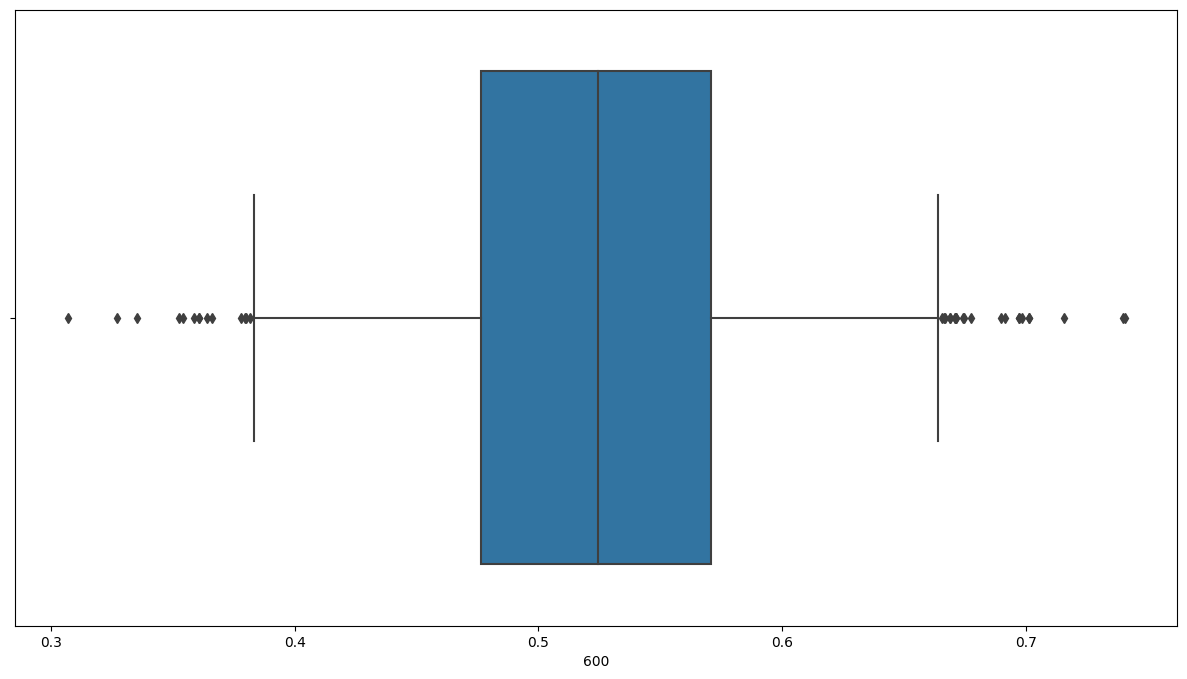

In [57]:
plt.figure(figsize = (15,8))
sns.boxplot( x = 600, data=df_1500, whis = 1)

In [58]:
def outliers():
    mean_list = []
    std_list = []
    max_list = []
    min_list = []
    for i in (200,1510,10):
        mean_list.append(df[df[601] == i].means())
        std_list.append(df[df[601] == i].std())
        max_list.append(mean_list[i] + 1.5 * std_list[i])
        min_list.append(mean_list[i] - 1.5 * std_list[i])
        
        

In [59]:
outliers()

AttributeError: 'DataFrame' object has no attribute 'means'